In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers


In [2]:
#Fetching Datasets
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()


In [3]:
#Number of Train/test sample
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['Aeroplane','Automobile','bird','cat','deer','dog','frog','horse',
         'ship','truck']

In [7]:
def plot(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

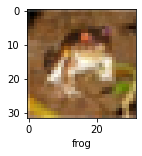

In [8]:
plot(x_train,y_train,0)

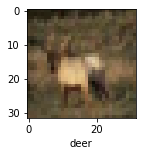

In [9]:
plot(x_train,y_train,3)

In [10]:
x_train  = x_train/255.
x_test = x_test/255.

### We'll train the model with ANN(Artifical Nueral Netwrok)

In [11]:

ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [12]:
ann.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=20,batch_size=512)

Epoch 1/20
98/98 [==============================] - 17s 166ms/step - loss: 2.0626 - accuracy: 0.2724
Epoch 2/20
98/98 [==============================] - 16s 161ms/step - loss: 1.8884 - accuracy: 0.3454
Epoch 3/20
98/98 [==============================] - 16s 162ms/step - loss: 1.8255 - accuracy: 0.3659
Epoch 4/20
98/98 [==============================] - 16s 162ms/step - loss: 1.7878 - accuracy: 0.3786
Epoch 5/20
98/98 [==============================] - 16s 166ms/step - loss: 1.7597 - accuracy: 0.3902
Epoch 6/20
98/98 [==============================] - 17s 173ms/step - loss: 1.7339 - accuracy: 0.3990
Epoch 7/20
98/98 [==============================] - 19s 191ms/step - loss: 1.7159 - accuracy: 0.4068
Epoch 8/20
98/98 [==============================] - 18s 183ms/step - loss: 1.6963 - accuracy: 0.4141
Epoch 9/20
98/98 [==============================] - 17s 175ms/step - loss: 1.6793 - accuracy: 0.4206
Epoch 10/20
98/98 [==============================] - 16s 162ms/step - loss: 1.6631 - accura

In [13]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.6026 - accuracy: 0.4397


[1.6025692224502563, 0.43970000743865967]

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classfication Report: \n",classification_report(y_test,y_pred_classes))

Classfication Report: 
               precision    recall  f1-score   support

           0       0.65      0.35      0.45      1000
           1       0.55      0.57      0.56      1000
           2       0.35      0.26      0.30      1000
           3       0.27      0.47      0.34      1000
           4       0.50      0.18      0.26      1000
           5       0.38      0.34      0.36      1000
           6       0.37      0.70      0.49      1000
           7       0.58      0.40      0.47      1000
           8       0.54      0.62      0.58      1000
           9       0.51      0.51      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.43     10000
weighted avg       0.47      0.44      0.43     10000



### Now we'll train this model with CNN(Convolutional Neural Network)

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3, 3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=20,batch_size=512)

Epoch 1/20
98/98 [==============================] - 25s 251ms/step - loss: 1.7834 - accuracy: 0.3591
Epoch 2/20
98/98 [==============================] - 27s 272ms/step - loss: 1.4317 - accuracy: 0.4923
Epoch 3/20
98/98 [==============================] - 26s 264ms/step - loss: 1.3013 - accuracy: 0.5416
Epoch 4/20
98/98 [==============================] - 24s 245ms/step - loss: 1.2242 - accuracy: 0.5713
Epoch 5/20
98/98 [==============================] - 25s 254ms/step - loss: 1.1496 - accuracy: 0.5996
Epoch 6/20
98/98 [==============================] - 26s 264ms/step - loss: 1.1064 - accuracy: 0.6145
Epoch 7/20
98/98 [==============================] - 25s 257ms/step - loss: 1.0614 - accuracy: 0.6316
Epoch 8/20
98/98 [==============================] - 23s 236ms/step - loss: 1.0267 - accuracy: 0.6432
Epoch 9/20
98/98 [==============================] - 23s 233ms/step - loss: 0.9846 - accuracy: 0.6601
Epoch 10/20
98/98 [==============================] - 23s 234ms/step - loss: 0.9608 - accura

In [16]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9416 - accuracy: 0.6718


[0.9416278600692749, 0.6718000173568726]

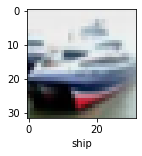

In [17]:
y_test = y_test.reshape(-1,)
plot(x_test,y_test,1)

In [18]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.86718644e-03, 7.56738707e-04, 2.65692789e-02, 7.71027446e-01,
        2.30600755e-03, 1.61476538e-01, 1.37889739e-02, 1.17681443e-03,
        1.84824094e-02, 1.54867489e-03],
       [9.83817037e-03, 8.19317624e-02, 4.08353080e-05, 1.55490113e-06,
        5.68537962e-06, 8.76728961e-07, 2.18214566e-08, 3.50404412e-06,
        9.05381918e-01, 2.79556145e-03],
       [6.20462373e-02, 2.04047278e-01, 8.91533622e-04, 4.04095417e-03,
        6.66762819e-04, 5.95421181e-04, 8.62075467e-05, 3.45493783e-04,
        6.98451042e-01, 2.88290605e-02],
       [7.08856583e-01, 8.31510499e-02, 1.21000800e-02, 1.34219078e-03,
        7.47080846e-03, 1.24970407e-04, 1.47434082e-04, 1.14184273e-04,
        1.83743551e-01, 2.94914446e-03],
       [4.56049165e-05, 2.44666415e-04, 1.24124745e-02, 6.03953898e-02,
        3.05227429e-01, 4.34255600e-03, 6.16859257e-01, 2.36277265e-05,
        3.74593510e-04, 7.44209756e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

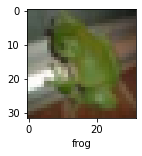

In [21]:
plot(x_test,y_test,7)

In [22]:
classes[y_classes[7]]

'frog'

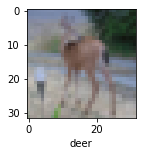

In [23]:
plot(x_test,y_test,100)

In [24]:
classes[y_classes[100]]

'deer'

In [25]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.67      0.72      1000
           1       0.72      0.85      0.78      1000
           2       0.60      0.50      0.54      1000
           3       0.60      0.34      0.43      1000
           4       0.67      0.56      0.61      1000
           5       0.48      0.75      0.59      1000
           6       0.66      0.84      0.74      1000
           7       0.83      0.65      0.73      1000
           8       0.72      0.83      0.77      1000
           9       0.75      0.73      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



# THANK YOU!